In [126]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.

This sample is taken from the Keras repo:
https://github.com/keras-team/keras

'''

import numpy as np
import matplotlib.pyplot as plt

# This step imports the needed keras functions.
from __future__ import print_function
import keras

# This step imports the actual data which is available in keras as as demo.
from keras.datasets import mnist

# This will import the model type of Sequential which will be used as a scaffold for the sequential model.
from keras.models import Sequential

# These layer types will be added to the sequential model
from keras.layers import Dense, Dropout, Flatten

# These layer types will also be added to create further features from the available data.
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [127]:
# Task 1: Create a variable called batch_size and set it to 128, create a variable num_classes and set it to 10, create a variable epochs and set it to 3.

batch_size = 128

num_classes = 10

epochs = 3

In [128]:
# Task 2: Create a variable called img_rows and img_cols and assign them both the value of 28

img_rows, img_cols = 28, 28

In [129]:
# The mnist library will return arrays with the load_data method.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# These datasets have already been split into test and train.

In [130]:
#What is the type of the x_train object?
type(x_train)

numpy.ndarray

In [131]:
# What is the shape (how many dimensions) is the x_train object?
x_train.shape

(60000, 28, 28)

In [132]:
# So this is 60 thousand images that are 28 by 28 pixels.
# Since the pictures are black and white each number is a pixel between 0 and 255.

In [133]:
# If white is 0 and black is 255 then this should look like a gradient when it is converted to pixels.
gradient = [i for i in range(28*28)]

In [134]:
print(gradient)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [135]:
#We should reshape the gradient so it is line by line - just like in the sample - so a 28x28 box instead of one 784 line.

gradient_box = np.array(gradient).reshape(28,28)

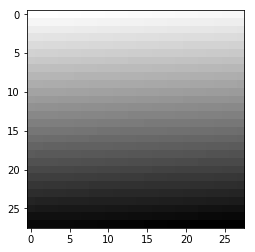

In [136]:
plt.imshow(gradient_box, cmap=plt.get_cmap('gray_r'))

In [137]:
# This is a function that will take a sample of the dataset and display what it looks like and then show what the 'ground truth' or real label is
def plot_digit(num_sample):
    # Get the label of the image.
    label = y_train[num_sample]
    # Get the actual pixels of the image
    img = x_train[num_sample].reshape([28,28])
    #Set the title of the sample number and what the label is
    plt.title('Sample: {0}  Groundtruth label: {1}'.format(num_sample, label))
    #Create a visual of the image
    plt.imshow(img, cmap=plt.get_cmap('gray_r'))
    #Show the image
    plt.show()

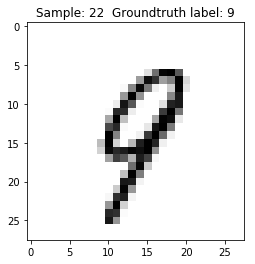

In [138]:
plot_digit(22)

In [139]:
for x in x_train[22].reshape(28,28):
    print([min(1,int(a)) for a in x])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0

In [140]:
# This step will reshape the data structures so they are in the right format for the model to train.
# Remember the img_rows and img_cols was set above to 28 and 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


In [141]:
input_shape = (img_rows, img_cols, 1)

In [142]:
print("""So this is {0} by {1} by {2} pixel""".format(input_shape[0], input_shape[1], input_shape[2]))

So this is 28 by 28 by 1 pixel


In [143]:
# Please se the types of the two x arrays as float32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [144]:
# This next function will normalise the data.
# Normalisation means that we can constrain the boundaries between 0 and 1.
# This function does this simply.


x_train /= 255
x_test /= 255




In [145]:

print('x_train shape:', x_train.shape)

# This means that there are 60 thousands samples of 28x28 arrays with one value each.

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [146]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [147]:
# This next section is about actually creating the model and starting training now that the data is prepared.

In [148]:
# First step is to create a sequential model
model = Sequential()

# This object accepts a number of different layers in the order that they are added.

In [149]:
#The first layer is a two dimension convolutional layer that is 3x3 in size with an activation function of 'relu'
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

![Conv](convolution.gif "Example")

In [150]:
# The second layer is doing this again.
model.add(Conv2D(64, (3, 3), activation='relu'))

In [151]:
# The third layer is pooling - it is grabbing the maximum value of each 4x4 square.

In [152]:
model.add(MaxPooling2D(pool_size=(2, 2)))

![football](figure.gif "Pooling")

In [153]:
# The forth layer is running dropout to remove some values randomly from the training. The idea around this is to reduce overfitting.

In [154]:
model.add(Dropout(0.25))

In [155]:
# The layer is then flattened.
# This reshapes the array to be one long line.

In [156]:
model.add(Flatten())

In [157]:
# This condensces down to 128 nodes
model.add(Dense(128, activation='relu'))

In [158]:
# ANother dropout layer to reduce overfitting
model.add(Dropout(0.5))

In [159]:
# The model is then reduced to predict one of the 10 classes using softmax.
model.add(Dense(num_classes, activation='softmax'))

In [161]:
# The compile function sets the loss, optimiser and metrics that will be produced.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [162]:
# This will start to train the model on the x,y train datasets.
# The number of records fed in at a time is the batch size.
# The epoch - or number of times the full sample will be pushed through the network is set.
# Verbose shows a nice processing output
# The validation data is provided so each epoch will have accuracy results

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 8960/60000 [===>..........................] - ETA: 1:48 - loss: 0.5315 - acc: 0.8304

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
K.image_data_format()